In [1]:
from calculations_utils import *
from plot_utils import *
import datetime
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 14})

# Check of consistency with Luis paper

In [2]:
distances = np.logspace(0,3,100)
omega = 2*np.pi*c*10**6/30
sigma, _ = conductivity(omega,e,10**(-12),300)

Pz1 = []
Px1 = []
Py1 = []
for d in distances:
    Pz1.append(P('z', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Px1.append(P('x', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Py1.append(P('y', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])

In [3]:
omega = 2*np.pi*c*10**6/10
sigma, _ = conductivity(omega,e,10**(-12),300)

Pz2 = []
Px2 = []
Py2 = []
for d in distances:
    Pz2.append(P('z', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Px2.append(P('x', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Py2.append(P('y', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])

In [4]:
omega = 2*np.pi*c*10**6/6
sigma, _ = conductivity(omega,e,10**(-12),300)

Pz3 = []
Px3 = []
Py3 = []
for d in distances:
    Pz3.append(P('z', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Px3.append(P('x', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Py3.append(P('y', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])

In [5]:
omega = 2*np.pi*c*10**6/1.5
sigma, _ = conductivity(omega,e,10**(-12),300)

Pz4 = []
Px4 = []
Py4 = []
for d in distances:
    Pz4.append(P('z', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Px4.append(P('x', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])
    Py4.append(P('y', omega,e,10**(-12),300,2*10**-9, (2 + d)*10**-9, 5)[0])

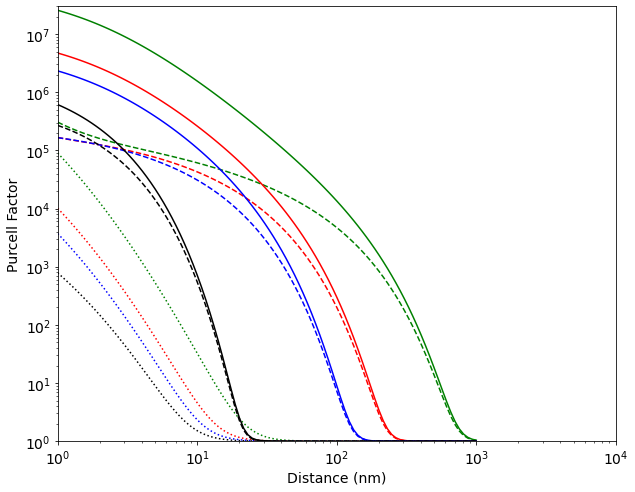

In [6]:
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 14})

plt.loglog(distances,Pz1,color='green',linestyle='dashed')
plt.loglog(distances,Px1,color='green',linestyle='solid')
plt.loglog(distances,Py1,color='green',linestyle='dotted')

plt.loglog(distances,Pz2,color='red',linestyle='dashed')
plt.loglog(distances,Px2,color='red',linestyle='solid')
plt.loglog(distances,Py2,color='red',linestyle='dotted')

plt.loglog(distances,Pz3,color='blue',linestyle='dashed')
plt.loglog(distances,Px3,color='blue',linestyle='solid')
plt.loglog(distances,Py3,color='blue',linestyle='dotted')

plt.loglog(distances,Pz4,color='black',linestyle='dashed')
plt.loglog(distances,Px4,color='black',linestyle='solid')
plt.loglog(distances,Py4,color='black',linestyle='dotted')

plt.xlabel('Distance (nm)')
plt.ylabel('Purcell Factor')
plt.xlim([1,10000])
plt.ylim([1,3*10**7])
plt.show()

# Dispersion relation

Text(0, 0.5, '$\\omega_p$ (eV)')

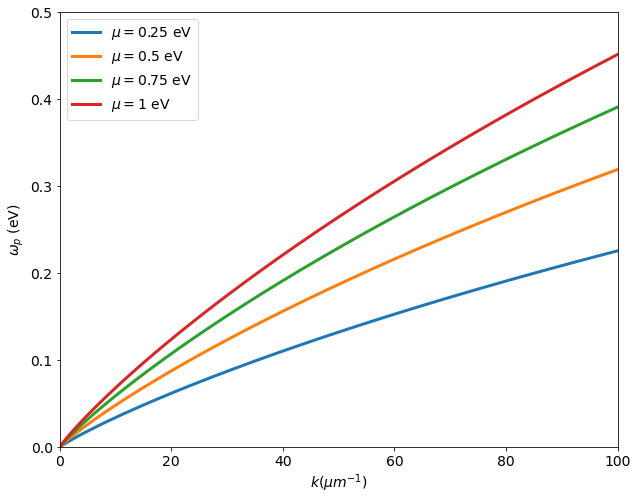

In [36]:
lambda_mum = np.arange(0.05,50,0.001)
kp_mum = 2*np.pi/(lambda_mum)
R = 2*10**(-9)

omega_p_ev = hbar*dispersion_relation_approximated(0, kp_mum*10**(6), 0.25*e, R)/e
plt.plot(kp_mum,omega_p_ev, linewidth=3, label='$\mu = 0.25$ eV')
omega_p_ev = hbar*dispersion_relation_approximated(0, kp_mum*10**(6), 0.5*e, R)/e
plt.plot(kp_mum,omega_p_ev, linewidth=3, label='$\mu = 0.5$ eV')
omega_p_ev = hbar*dispersion_relation_approximated(0, kp_mum*10**(6), 0.75*e, R)/e
plt.plot(kp_mum,omega_p_ev, linewidth=3, label='$\mu = 0.75$ eV')
omega_p_ev = hbar*dispersion_relation_approximated(0, kp_mum*10**(6), e, R)/e
plt.plot(kp_mum,omega_p_ev, linewidth=3, label='$\mu = 1$ eV')

plt.xlim([0,100])
plt.ylim([0,0.5])
plt.legend()
plt.xlabel('$k (\mu m^{-1})$')
plt.ylabel('$\omega_p$ (eV)')

# TPSE spectral densities (CNTs)

In [8]:
lambda_0 = 4.05*10**(-6)
omega_0 = 2*np.pi*c/lambda_0
mu_ev_array = np.array([0.25,0.5,0.75,1])
T = 300
R = 2*10**(-9)
d = R + 10*10**(-9)
m_max = 5

gammas = []
omega_steps = np.linspace(0.01,0.5,50)
for mu_ev in mu_ev_array:
    gamma_mu = []
    for step in omega_steps:
        gamma_mu.append(gamma(omega_0, omega_0*step, mu_ev*e, tau_g(10**4,mu_ev*e), T, R, d, m_max))
    gammas.append(gamma_mu)

c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:90: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral = integrate.quad(integrand, 0, 10/R)


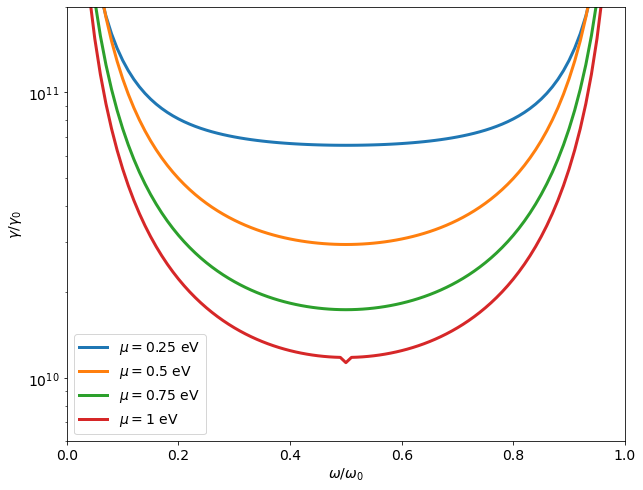

In [33]:
plt.plot(np.linspace(0.01,0.99,99),gammas[0][:-1] + gammas[0][::-1], label='$\mu = 0.25$ eV', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gammas[1][:-1] + gammas[1][::-1], label='$\mu = 0.5$ eV', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gammas[2][:-1] + gammas[2][::-1], label='$\mu = 0.75$ eV', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gammas[3][:-1] + gammas[3][::-1], label='$\mu = 1$ eV', linewidth=3)

plt.xlim([0,1])
plt.ylim([6*10**9,2*10**11])
plt.legend()
plt.xlabel('$\omega/\omega_0$')
plt.ylabel('$\gamma/\gamma_0$')
plt.yscale('log')

# TPSE spectral densities (Graphene coated wire)

In [3]:
lambda_0 = 1.875*10**(-6)
omega_0 = 2*np.pi*c/lambda_0
mu_ev_array = np.array([0.2, 0.4, 0.6])
T = 300
R = 10*10**(-9)
d = R + 10*10**(-9)
m_max = 10

gammas = []
omega_steps = np.linspace(0.01,0.5,50)
for mu_ev in mu_ev_array:
    gamma_mu = []
    for step in omega_steps:
        gamma_mu.append(gamma(omega_0, omega_0*step, mu_ev*e, tau_g(10**4,mu_ev*e), T, R, d, m_max))
    gammas.append(gamma_mu)

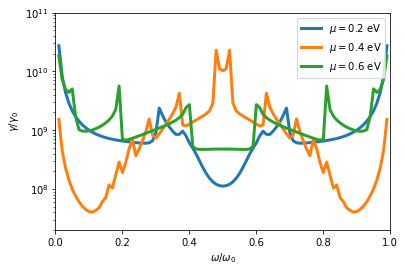

In [4]:
plt.plot(np.linspace(0.01,0.99,99),gammas[0][:-1] + gammas[0][::-1], label='$\mu = 0.2$ eV', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gammas[1][:-1] + gammas[1][::-1], label='$\mu = 0.4$ eV', linewidth=3)
plt.plot(np.linspace(0.01,0.99,99),gammas[2][:-1] + gammas[2][::-1], label='$\mu = 0.6$ eV', linewidth=3)

plt.xlim([0,1])
plt.ylim([2*10**7,10*10**10])
plt.legend()
plt.xlabel('$\omega/\omega_0$')
plt.ylabel('$\gamma/\gamma_0$')
plt.yscale('log')

In [3]:
lambda_0 = 1.875*10**(-6)
omega_0 = 2*np.pi*c/lambda_0
mu = e
T = 300
R_nm_array = np.arange(10,101,1)
distance_nm = 10
m_max = 10

gammas = []
omega_steps = np.linspace(0.01,0.5,50)
for R_nm in R_nm_array:
    print('R (nm):', R_nm)
    gamma_R = []
    for step in omega_steps:
        gamma_R.append(gamma(omega_0, omega_0*step, mu, tau_g(10**4,mu), T, R_nm*10**(-9), (distance_nm + R_nm)*10**(-9), m_max))
    gammas.append(gamma_R)

np.save('contour_plot_data.npy',np.array(gammas))

R (nm): 10
R (nm): 11
R (nm): 12
R (nm): 13
R (nm): 14
R (nm): 15
R (nm): 16
R (nm): 17
R (nm): 18
R (nm): 19
R (nm): 20
R (nm): 21
R (nm): 22
R (nm): 23
R (nm): 24
R (nm): 25
R (nm): 26
R (nm): 27
R (nm): 28
R (nm): 29
c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:93: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integral = integrate.quad(integrand, 0, 10/R)
R (nm): 30
R (nm): 31
R (nm): 32
c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be de

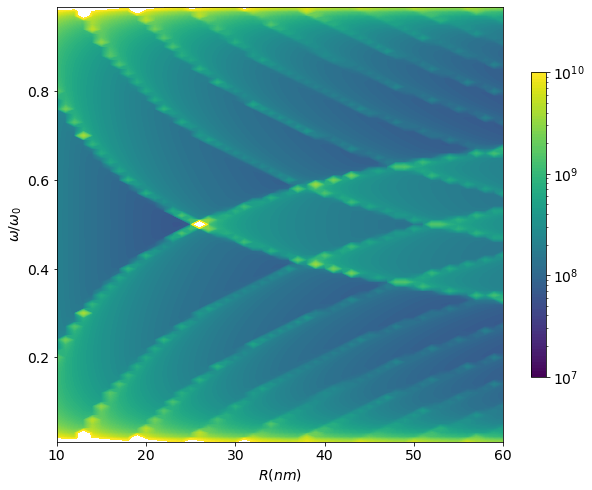

In [45]:
from matplotlib import ticker, cm

omega_steps = np.linspace(0.01,0.99,99)
R_nm_array = np.arange(10,101,1)
gammas_half = np.load('contour_plot_data.npy')

gammas = []
for i in range(len(gammas_half)):
    gammas.append(list(gammas_half[i][:-1]) + list(gammas_half[i][::-1]))
gammas = np.transpose(np.array(gammas))

#Plotting the DC conductivities
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(10, 8),nrows=1, ncols=1)

c = ax.contourf(R_nm_array, omega_steps, gammas, np.logspace(7, 10,100), locator=ticker.LogLocator())
b0 = fig.colorbar(c,ax=ax,ticks=[10**i for i in range(6,13,1)], shrink=0.7)
ax.set_xlabel("$R (nm)$")
ax.set_ylabel("$\omega/\omega_0$")
ax.set_xlim(right=60)

plt.show()

# TPSE rate an quantum efficiencies (CNTs)

In [2]:
T = 300
R = 2*10**(-9)
mu_ev_array = np.array([0.25,0.5,0.75,1])
mob = 10**4
MCut = 10
m_max = 10
omegaCut = 0.0000044*e/hbar

ne = 5
ng = 4
d_matrix = []
dne = []
dng = []
for m in range(2,MCut + 1):
    dne.append(d(ne,m))
    dng.append(d(ng,m))

d_matrix.append(dne)
d_matrix.append(dng)

distances_nm = np.arange(1,102,5)
Gammas = []
for mu_ev in mu_ev_array:
    print('\nmu (ev):', mu_ev)
    Gamma_mu = []
    for distance_nm in distances_nm:
        print('d (nm):', distance_nm)
        Gamma_mu.append(Gamma(d_matrix, ne, ng, mu_ev*e, tau_g(mob,mu_ev*e), T, R, R + distance_nm*10**(-9), m_max, MCut, omegaCut))
    Gammas.append(Gamma_mu)

np.save('Gamma_CNT.npy',np.array(Gammas))


mu (ev): 0.25
d (nm): 1
d (nm): 6
d (nm): 11
d (nm): 16
d (nm): 21
d (nm): 26
d (nm): 31
d (nm): 36
d (nm): 41
d (nm): 46
d (nm): 51
d (nm): 56
d (nm): 61
d (nm): 66
d (nm): 71
d (nm): 76
d (nm): 81
d (nm): 86
d (nm): 91
d (nm): 96
d (nm): 101

mu (ev): 0.5
d (nm): 1
d (nm): 6
d (nm): 11
d (nm): 16
d (nm): 21
d (nm): 26
d (nm): 31
d (nm): 36
d (nm): 41
d (nm): 46
d (nm): 51
d (nm): 56
d (nm): 61
d (nm): 66
d (nm): 71
d (nm): 76
d (nm): 81
d (nm): 86
d (nm): 91
d (nm): 96
d (nm): 101

mu (ev): 0.75
d (nm): 1
d (nm): 6
c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:93: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral = integrate.quad(integrand, 0, 10/R)
d (nm): 11
d (nm): 16
c:\Users\Yuri\Documents\doutorado\nanotubos\carbon_nanotubes\calculations_utils.py:93: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance

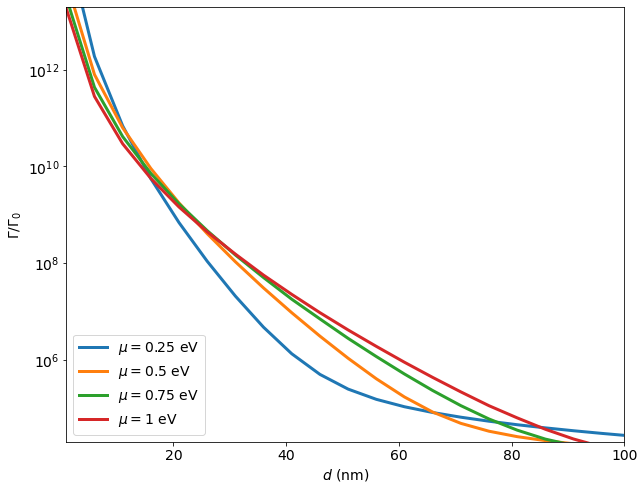

In [15]:
Gammas = np.load('Gamma_CNT.npy')
#G0 = Gamma_0(d_matrix, 5, 4, 10, omegaCut)

plt.plot(np.arange(1,102,5),Gammas[0]/G0, label='$\mu = 0.25$ eV', linewidth=3)
plt.plot(np.arange(1,102,5),Gammas[1]/G0, label='$\mu = 0.5$ eV', linewidth=3)
plt.plot(np.arange(1,102,5),Gammas[2]/G0, label='$\mu = 0.75$ eV', linewidth=3)
plt.plot(np.arange(1,102,5),Gammas[3]/G0, label='$\mu = 1$ eV', linewidth=3)


plt.xlim([1,100])
plt.ylim([2*10**4,2*10**13])
plt.legend(loc='lower left')
plt.xlabel('$d$ (nm)')
plt.ylabel('$\Gamma/\Gamma_0$')
plt.yscale('log')

# TPSE rate and quantum efficiencies (Graphene coated wire)

In [5]:
before = datetime.datetime.now()
print(Gamma_0(d_matrix, 5, 4, 10, omegaCut))
after = datetime.datetime.now()
print(after - before)

0.0003022625313621322
0:00:00.002000
